In [ ]:
!pip install -q yfinance

#1. Downloading and Viewing Dataset

In [ ]:
#importing Libraries
import yfinance as yf #yahoo finance
import math # Mathematical functions
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, datetime # Date Functions
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data
import seaborn as sns # Visualization
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})


In [ ]:
#acccesing data from yahoo finance
stock = yf.Ticker("INTC")

In [ ]:
# get historical market data
stock = stock.history(period="max")

In [ ]:
#display data on the dataframe
stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-02 00:00:00-04:00,27.893273,28.465544,27.044733,27.054600,51956100,0.000,0.0
2022-11-03 00:00:00-04:00,27.084201,27.508470,26.807932,27.025000,39678200,0.000,0.0
2022-11-04 00:00:00-04:00,27.570000,28.240000,27.410000,28.200001,43045800,0.365,0.0
2022-11-07 00:00:00-05:00,28.360001,28.469999,27.889999,28.410000,34389800,0.000,0.0
2022-11-08 00:00:00-05:00,28.760000,28.950001,27.930000,28.480000,36233100,0.000,0.0


In [ ]:
# Summary Stats
stock.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10755.000000,10755.000000,10755.000000,10755.000000,1.075500e+04,10755.000000,10755.000000
mean,14.677294,14.869700,14.486013,14.676961,5.063565e+07,0.001556,0.001441
std,15.017249,15.201469,14.835631,15.018379,3.499318e+07,0.019545,0.053017
min,0.126486,0.126486,0.124980,0.124980,0.000000e+00,0.000000,0.000000
25%,0.754400,0.767951,0.740847,0.756282,2.700150e+07,0.000000,0.000000
50%,12.697467,12.895019,12.562993,12.721395,4.467920e+07,0.000000,0.000000
75%,19.677303,19.944068,19.392980,19.630370,6.490435e+07,0.000000,0.000000
max,64.326649,64.600179,62.845817,64.383247,5.677088e+08,0.365000,2.000000


In [ ]:
# General info
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10755 entries, 1980-03-17 00:00:00-05:00 to 2022-11-08 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10755 non-null  float64
 1   High          10755 non-null  float64
 2   Low           10755 non-null  float64
 3   Close         10755 non-null  float64
 4   Volume        10755 non-null  int64  
 5   Dividends     10755 non-null  float64
 6   Stock Splits  10755 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 930.2 KB


In [ ]:
#checking for the index
stock.index

DatetimeIndex(['1980-03-17 00:00:00-05:00', '1980-03-18 00:00:00-05:00',
               '1980-03-19 00:00:00-05:00', '1980-03-20 00:00:00-05:00',
               '1980-03-21 00:00:00-05:00', '1980-03-24 00:00:00-05:00',
               '1980-03-25 00:00:00-05:00', '1980-03-26 00:00:00-05:00',
               '1980-03-27 00:00:00-05:00', '1980-03-28 00:00:00-05:00',
               ...
               '2022-10-26 00:00:00-04:00', '2022-10-27 00:00:00-04:00',
               '2022-10-28 00:00:00-04:00', '2022-10-31 00:00:00-04:00',
               '2022-11-01 00:00:00-04:00', '2022-11-02 00:00:00-04:00',
               '2022-11-03 00:00:00-04:00', '2022-11-04 00:00:00-04:00',
               '2022-11-07 00:00:00-05:00', '2022-11-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10755, freq=None)

#2. Visualising The Data

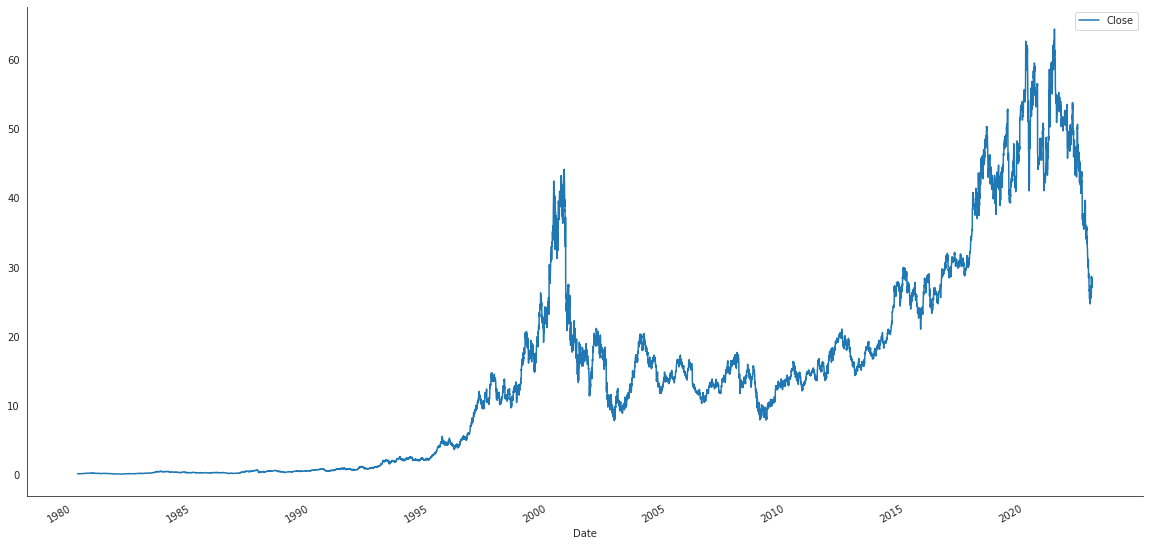

In [ ]:
# Plotting historical view of the closing price
stock.plot.line(y="Close", use_index=True,figsize=(20, 10))

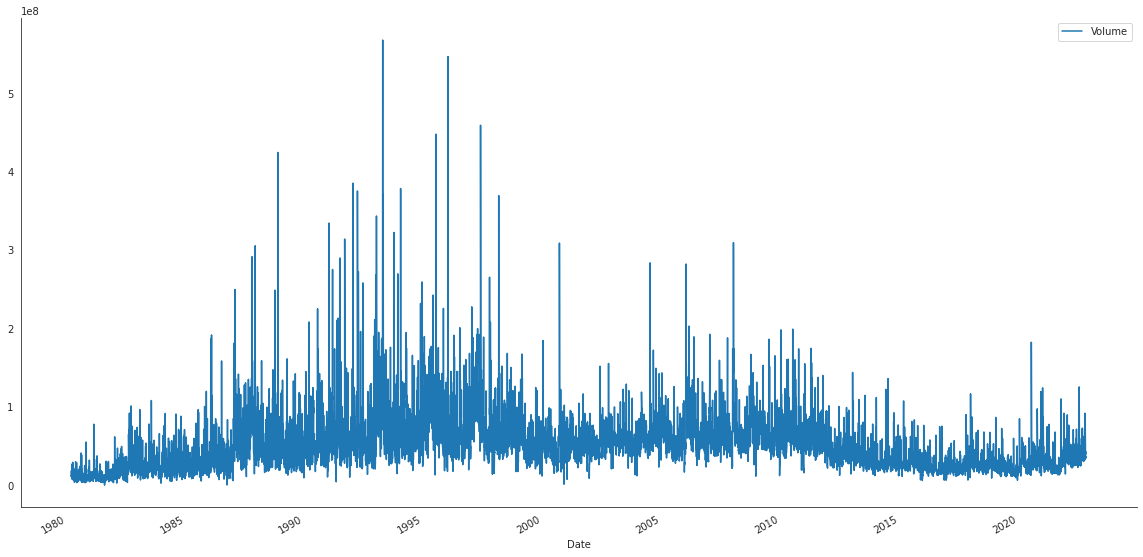

In [ ]:
# Plotting the total volume of stock being traded each day
stock.plot.line(y="Volume", use_index=True,figsize=(20, 10))

In [ ]:
ma_day = [10, 20, 50]
for ma in ma_day:
  column_name = f"MA for {ma} days"
  stock[column_name] = stock['Close'].rolling(ma).mean()

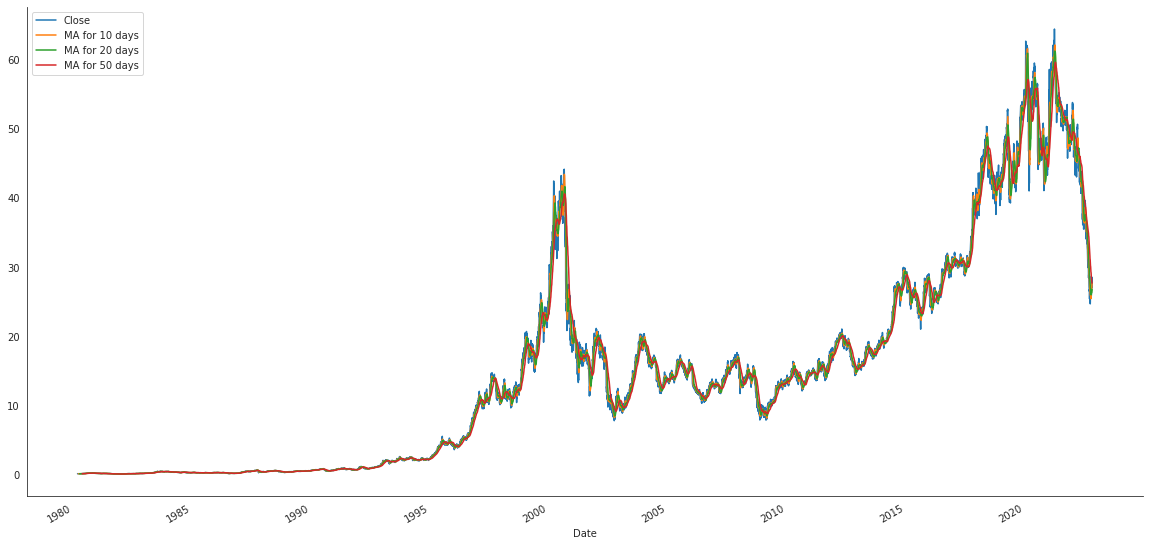

In [ ]:
#Plottng Moving averages for 10,20,50 days
stock[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(20, 10))

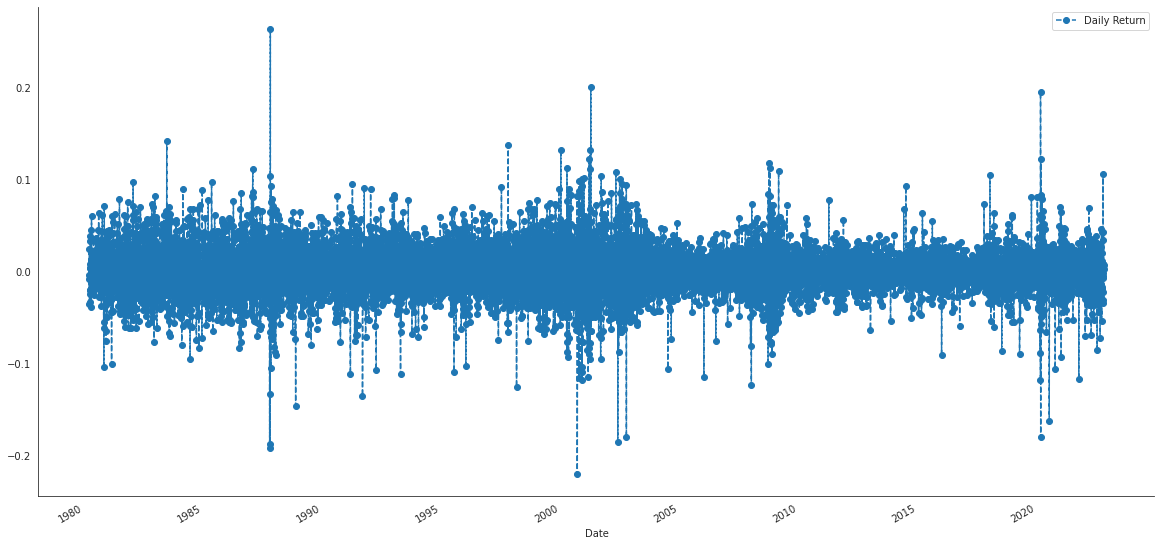

In [ ]:
stock['Daily Return'] = stock['Close'].pct_change()
# Plotting the daily return percentage
stock['Daily Return'].plot(legend=True, linestyle='--', marker='o',figsize=(20, 10))

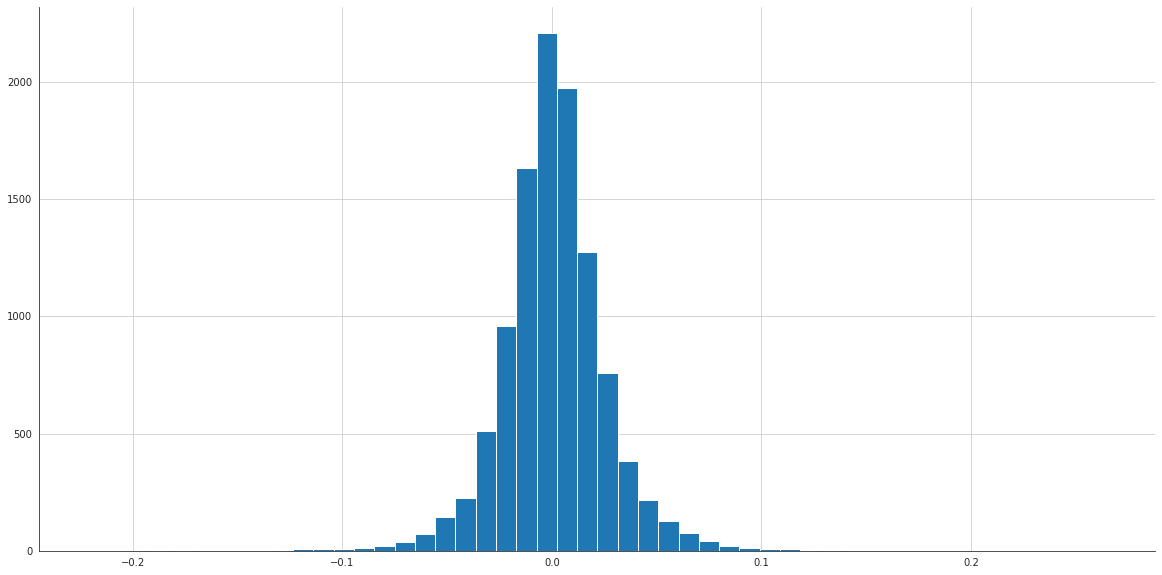

In [ ]:
 stock['Daily Return'].hist(bins=50,figsize=(20, 10))

#3. Preparing Data for Prediction

##3.1. Preparation of Data for Univariate LSTM

In [ ]:
# Create a new dataframe with only the 'Close column
data_uni= stock.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data_uni.values

In [ ]:
#Scale the Data
scaler_uni = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_uni.fit_transform(dataset)

training_data_len = int(np.ceil( len(dataset) * .80 ))

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data_uni = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_uni_train = []
y_uni_train = []
lookback = 60
for i in range(lookback, len(train_data_uni)):
    x_uni_train.append(train_data_uni[i-lookback:i, 0])
    y_uni_train.append(train_data_uni[i, 0])

# Convert the x_train and y_train to numpy arrays
x_uni_train, y_uni_train = np.array(x_uni_train), np.array(y_uni_train)

# Reshape the data
x_uni_train = np.reshape(x_uni_train, (x_uni_train.shape[0], x_uni_train.shape[1], 1))


###3.2. Preparation of Data for Multivariate LSTM

In [ ]:
# Indexing Batches
train_df = stock.copy()

# List of considered Features
FEATURES = ['High', 'Low', 'Open', 'Close']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['High', 'Low', 'Open', 'Close']


,High,Low,Open,Close,Prediction
Date,,,,,
2022-11-02 00:00:00-04:00,28.465544,27.044733,27.893273,27.054600,27.054600
2022-11-03 00:00:00-04:00,27.508470,26.807932,27.084201,27.025000,27.025000
2022-11-04 00:00:00-04:00,28.240000,27.410000,27.570000,28.200001,28.200001
2022-11-07 00:00:00-05:00,28.469999,27.889999,28.360001,28.410000,28.410000
2022-11-08 00:00:00-05:00,28.950001,27.930000,28.760000,28.480000,28.480000


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler1 = MinMaxScaler()
np_data_scaled = scaler1.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(10755, 4)


In [ ]:
# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - lookback:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, lookback time steps per sample, and 6 features
def partition_dataset(lookback, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(lookback, data_len):
        x.append(data[i-lookback:i,:]) #contains lookback values 0-lookback * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction

    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(lookback, train_data)
x_test, y_test = partition_dataset(lookback, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][lookback-1][index_Close])
print(y_train[0])

(8544, 60, 4) (8544,)
(2151, 60, 4) (2151,)
0.0012419709598127813
0.0012419709598127813


#4. Creating LSTM Model

###4.3 Creating Univariate Prediction Model

In [ ]:
model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape= (x_uni_train.shape[1], 1)))
model1.add(LSTM(128, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 201,395
Trainable params: 201,395
Non-trainable params: 0
_________________________________________________________________


###4.2. Creatinng Multivariate Prediction Model

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 128)           68096     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 25)                3225      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 202,931
Trainable params: 202,931
Non-trainable params: 0
_________________________________________________________________


#5. Compile and Training Models

##5.1 Univariate Model

In [ ]:
epochs = 10
batch_size = 16

In [ ]:
model1.compile(optimizer='adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model1.fit(x_uni_train, y_uni_train,
                    batch_size=batch_size,
                    epochs=epochs
                   )

Epoch 1/10
534/534 [==============================] - 61s 107ms/step - loss: 2.7818e-04
Epoch 2/10
534/534 [==============================] - 53s 100ms/step - loss: 9.0124e-05
Epoch 3/10
534/534 [==============================] - 52s 98ms/step - loss: 8.4138e-05
Epoch 4/10
534/534 [==============================] - 51s 95ms/step - loss: 7.0921e-05
Epoch 5/10
534/534 [==============================] - 51s 96ms/step - loss: 5.7587e-05
Epoch 6/10
534/534 [==============================] - 51s 96ms/step - loss: 5.4921e-05
Epoch 7/10
534/534 [==============================] - 51s 96ms/step - loss: 4.8967e-05
Epoch 8/10
534/534 [==============================] - 52s 98ms/step - loss: 4.8050e-05
Epoch 9/10
534/534 [==============================] - 51s 96ms/step - loss: 4.1577e-05
Epoch 10/10
534/534 [==============================] - 52s 96ms/step - loss: 5.3373e-05


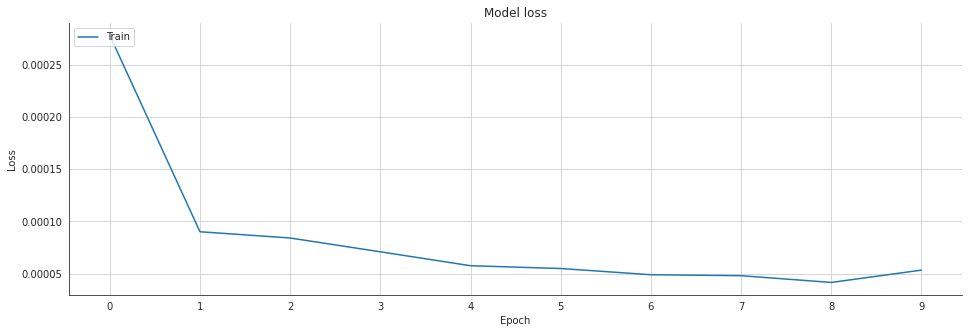

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

## 5.2 Multiivariate Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_mul = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )

Epoch 1/10
534/534 [==============================] - 59s 105ms/step - loss: 2.6348e-04 - val_loss: 7.0921e-04
Epoch 2/10
534/534 [==============================] - 56s 105ms/step - loss: 1.0468e-04 - val_loss: 3.6761e-04
Epoch 3/10
534/534 [==============================] - 55s 104ms/step - loss: 8.2863e-05 - val_loss: 4.5166e-04
Epoch 4/10
534/534 [==============================] - 55s 104ms/step - loss: 7.2169e-05 - val_loss: 3.7321e-04
Epoch 5/10
534/534 [==============================] - 55s 104ms/step - loss: 6.2951e-05 - val_loss: 2.0986e-04
Epoch 6/10
534/534 [==============================] - 56s 105ms/step - loss: 5.7518e-05 - val_loss: 9.9695e-04
Epoch 7/10
534/534 [==============================] - 55s 102ms/step - loss: 5.1161e-05 - val_loss: 2.6680e-04
Epoch 8/10
534/534 [==============================] - 54s 100ms/step - loss: 4.4584e-05 - val_loss: 0.0010
Epoch 9/10
534/534 [==============================] - 55s 102ms/step - loss: 4.3731e-05 - val_loss: 2.9126e-04
Epoch

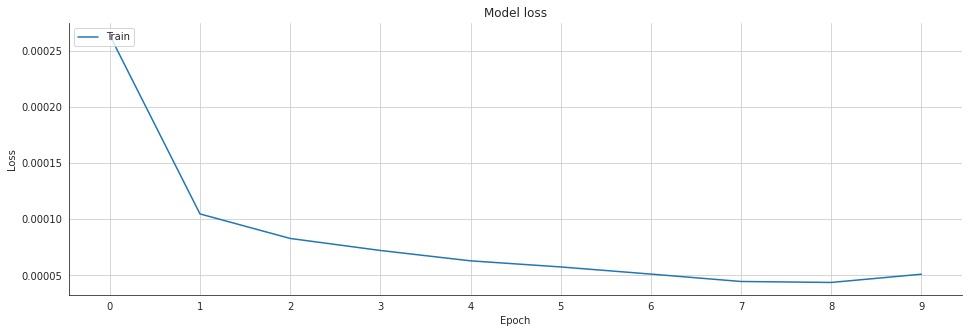

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history_mul.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

#6. Testing Model

##6.1 Testing Univariate Model

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_uni_test = []
y_uni_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_uni_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_uni_test = np.array(x_uni_test)

# Reshape the data
x_uni_test = np.reshape(x_uni_test, (x_uni_test.shape[0], x_uni_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model1.predict(x_uni_test)
predictions = scaler_uni.inverse_transform(predictions)

# Mean Absolute Error (MAE)
MAE_uni = mean_absolute_error(y_uni_test, predictions)
print(f'Median Absolute Error (MAE): {np.round(MAE_uni, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE_uni = np.mean((np.abs(np.subtract(y_uni_test, predictions)/ y_uni_test))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE_uni, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE_uni = np.median((np.abs(np.subtract(y_uni_test, predictions)/ y_uni_test)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE_uni, 2)} %')


68/68 [==============================] - 5s 66ms/step
Median Absolute Error (MAE): 0.57
Mean Absolute Percentage Error (MAPE): 1.4 %
Median Absolute Percentage Error (MDAPE): 0.97 %


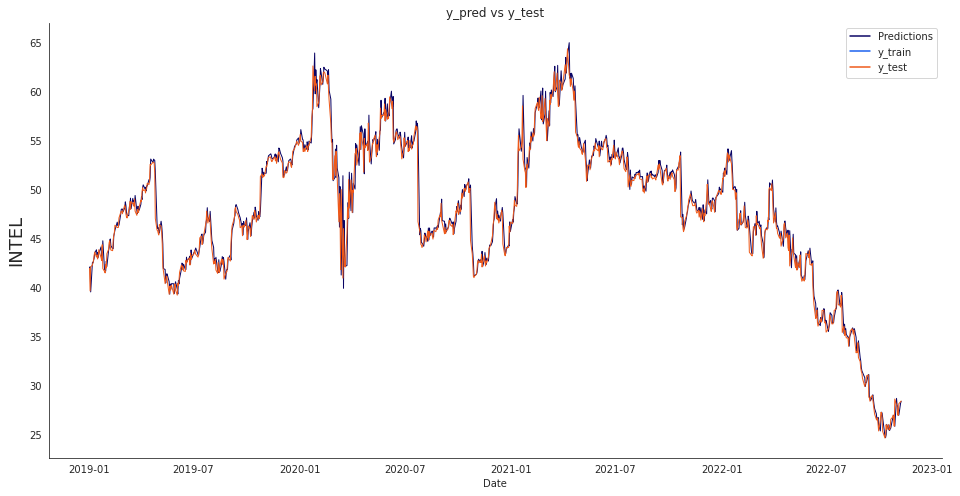

In [ ]:
# The date from which on the date is displayed
display_start_date = "2019-01-01"

# Plot the data
train = data[:training_data_len].rename(columns={'Close': 'y_train'})
valid = data[training_data_len:].rename(columns={'Close': 'y_test'})
valid['Predictions'] = predictions

df_union1 = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom1 = df_union1[df_union1.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel("INTEL", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom1[['Predictions', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

##6.2 Testing Multivariate model

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE_mult = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE_mult, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE_mult = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE_mult, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE_mult = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE_mult, 2)} %')


68/68 [==============================] - 5s 65ms/step
Median Absolute Error (MAE): 1.18
Mean Absolute Percentage Error (MAPE): 2.81 %
Median Absolute Percentage Error (MDAPE): 2.55 %


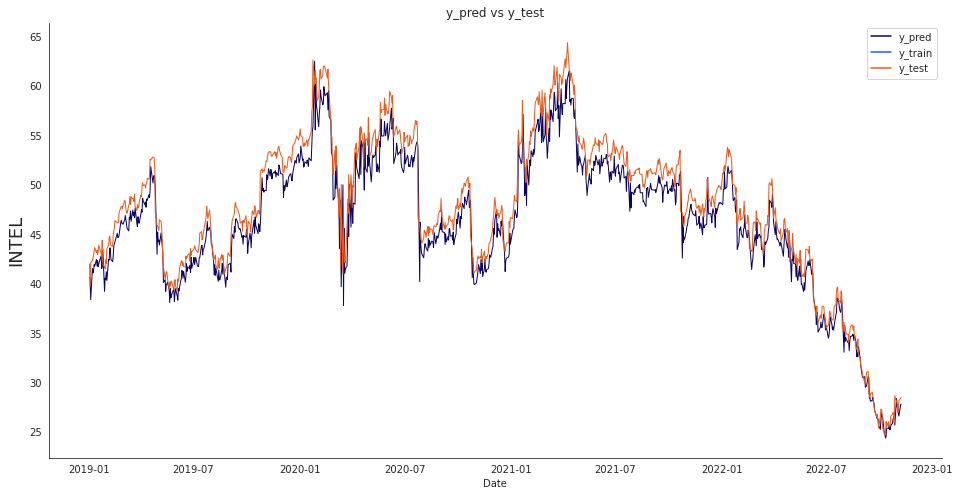

In [ ]:
# The date from which on the date is displayed
display_start_date = "2019-01-01"

# Add the difference between the valid and predicted prices
train = pd.DataFrame(data_filtered_ext['Close'][:train_data_len + 1]).rename(columns={'Close': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['Close'][train_data_len:]).rename(columns={'Close': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel("INTEL", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union_zoom[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)


##7. Forecasting Future Prices

##7.1 Future Prediction Using Univariate Model

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
f_data = scaled_data[- lookback: , :]

end_date =  date.today().strftime("%Y-%m-%d")

# Convert the data to a numpy array
x_future = []
x_future.append(f_data)


# Get the models predicted price values
predictions = model1.predict(x_future)
predictions = scaler_uni.inverse_transform(predictions)

# Print last price and predicted price for the next day
price_today_uni = np.round(x_future[0][-1], 2)
predicted_price_uni = np.round(predictions.ravel()[0], 2)
change_percent_uni = np.round(100 - (price_today_uni * 100)/predicted_price_uni, 2)

plus = '+'; minus = ''
print(f'The close price for INTC at {end_date} was {price_today_uni}')
print(f'The predicted close price is {predicted_price_uni} ({plus if change_percent_uni > 0 else minus}{change_percent_uni}%)')

2/2 [==============================] - 1s 8ms/step
The close price for INTC at 2022-11-09 was [0.44]
The predicted close price is 33.97999954223633 (+[98.71]%)


##7.2 Future PredictionUsing Multivariate Model

In [ ]:
df_temp = stock[-lookback:]
new_df = df_temp.filter(FEATURES)

N = lookback

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-lookback:].values
last_N_days_scaled = scaler1.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(new_df['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for INTC at {end_date} was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

1/1 [==============================] - 0s 28ms/step
The close price for INTC at 2022-11-09 was 28.48
The predicted close price is 28.010000228881836 (-1.68%)
